# Session 3: Functions and Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Defining and Calling Functions
## Part 2: Function parameters and return values

### Functions can take parameters (inputs) and return outputs.

#### Example 1: Calculate apparent magnitude from flux

In [36]:
flux_star = 1200
mag_star = -2.5 * np.log10(flux_star)

print("The apparent magnitude of the star is %.2f."%mag_star)

The apparent magnitude of the star is -7.70.


In [39]:
def flux_to_magnitude(flux):
    """Convert flux (in arbitrary units) to magnitude."""
    magnitude = -2.5 * np.log10(flux)
    return magnitude

In [40]:
# Using the function

flux_star = 1200  # Example flux value
mag_star = flux_to_magnitude(flux_star)

print("The apparent magnitude of the star is %.2f."%mag_star)

The apparent magnitude of the star is -7.70.


### Example: Calculate the Distance Modulus

In astronomy, the distance modulus relates absolute and apparent magnitudes:

$$[m - M = 5 \log_{10}{(d)} - 5]$$

where:

m= apparent magnitude 

M= absolute magnitude 

d= distance in parsecs 


In [41]:
def distance_modulus(apparent_mag, absolute_mag):
    """Compute the distance to a star in parsecs from its magnitudes."""
    distance_pc = 10 ** ((apparent_mag - absolute_mag + 5) / 5)
    return distance_pc

In [42]:
# Example usage:
apparent_mag = 10.5
absolute_mag = 5.0

distance = distance_modulus(apparent_mag, absolute_mag)
print("The distance to the star is approximately %.1f parsecs."%distance)

The distance to the star is approximately 125.9 parsecs.


## Part 3: Default arguments and keyword arguments


### Default Arguments
#### Default arguments are parameters that assume a default value if no value is provided when the function is called.

### Keyword Arguments
#### When calling a function, you can specify arguments by name, regardless of their position. These are called keyword arguments.

#### Example: Simulate observing a light curve with optional noise

In [14]:
def generate_light_curve(period_days, amplitude=0.1, noise_level=0.0):
    """Generate a simple sinusoidal light curve with optional noise."""
    time = np.linspace(0, 5*period_days, 100)  # Observe for 5 periods (defining cadence of observation)
    flux = 1 + amplitude * np.sin(2 * np.pi * time / period_days)
    
    if noise_level > 0:
        noise = np.random.normal(0, noise_level, size=time.shape)
        flux += noise
        
    return time, flux

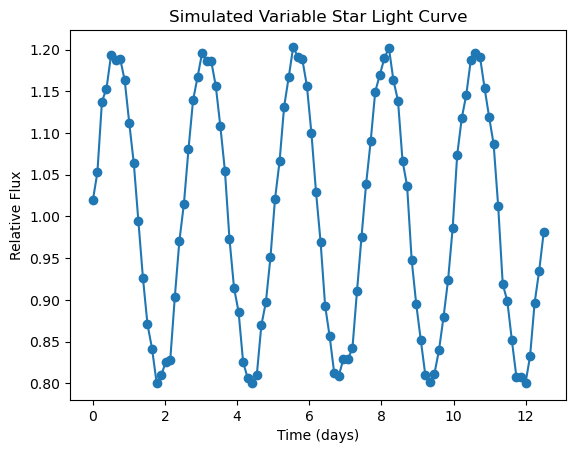

In [46]:
time, flux = generate_light_curve(period_days=2.5, amplitude=0.2, noise_level=0.01)


plt.plot(time, flux, marker='o', linestyle='-')
plt.xlabel('Time (days)')
plt.ylabel('Relative Flux')
plt.title('Simulated Variable Star Light Curve')
plt.show()

## Part 4: NumPy and SciPy for Scientific Calculations

### **NumPy** is essential for array operations, matrix math, and scientific computing.

In [25]:
def analyze_image(image):
    """Analyze basic properties of an astronomical image."""
    mean_value = np.mean(image)
    std_dev = np.std(image)
    max_value = np.max(image)
    min_value = np.min(image)
    return mean_value, std_dev, min_value, max_value

In [47]:
# Simulate an image with background noise
np.random.seed(42)  # for reproducibility
background = np.random.normal(loc=1000, scale=50, size=(100, 100))

# Create a Gaussian PSF centered at (50, 50)
# PSF = Point Spread Function
y, x = np.indices((100, 100))  # create a coordinate grid
center_x, center_y = 50, 50
sigma = 3  # width of the PSF
amplitude = 5000  # peak brightness

psf = amplitude * np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))

# Add the source to the background
image = background + psf

Text(0.5, 1.0, 'Simulated Astronomical Image with Gaussian Source')

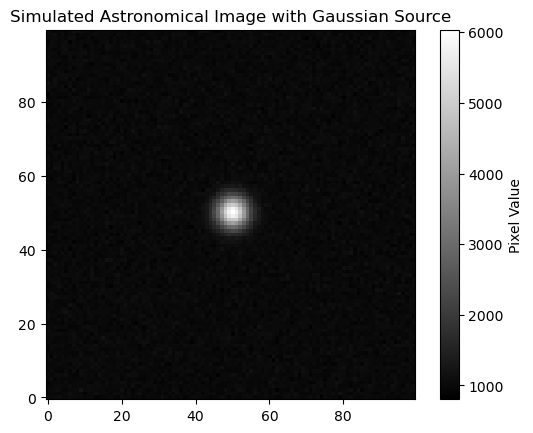

In [48]:
# Visualize the image
plt.imshow(image, cmap='gray', origin='lower')
plt.colorbar(label='Pixel Value')
plt.title('Simulated Astronomical Image with Gaussian Source')

In [49]:
# Analyze the image
mean_val, std_val, min_val, max_val = analyze_image(image)

print(f"Image mean: {mean_val:.1f}")
print(f"Image standard deviation: {std_val:.1f}")
print(f"Image min value: {min_val:.1f}")
print(f"Image max value: {max_val:.1f}")




Image mean: 1028.2
Image standard deviation: 269.3
Image min value: 803.9
Image max value: 6036.5


In [52]:
stats = analyze_image(image)

print(f"Image mean: {stats[0]:.1f}")
print(f"Image standard deviation: {stats[1]:.1f}")
print(f"Image min value: {stats[2]:.1f}")
print(f"Image max value: {stats[3]:.1f}")

Image mean: 1028.2
Image standard deviation: 269.3
Image min value: 803.9
Image max value: 6036.5


### ***SciPy*** builds on NumPy and provides more advanced scientific functions, like optimization and signal processing.

In [53]:
from scipy.ndimage import gaussian_filter1d

def smooth_light_curve(flux, sigma=2):
    """Smooth the light curve using a Gaussian filter."""
    return gaussian_filter1d(flux, sigma=sigma)

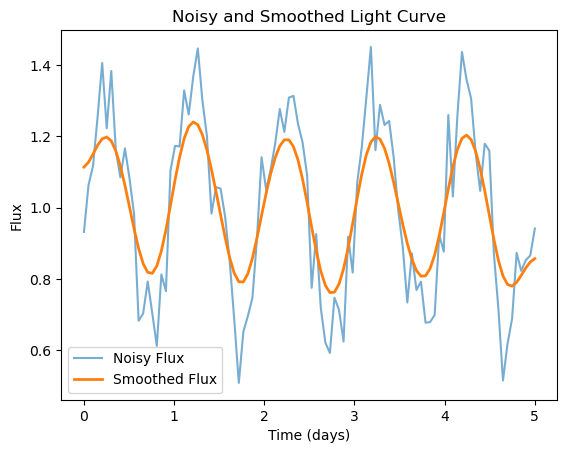

In [54]:
# Simulate a noisy light curve
time, noisy_flux = generate_light_curve(period_days=1.0, amplitude=0.3, noise_level=0.1)

# Smooth the light curve
smoothed_flux = smooth_light_curve(noisy_flux, sigma=3)

# Plot
plt.plot(time, noisy_flux, label='Noisy Flux', alpha=0.6)
plt.plot(time, smoothed_flux, label='Smoothed Flux', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('Noisy and Smoothed Light Curve')
plt.legend()
plt.show()

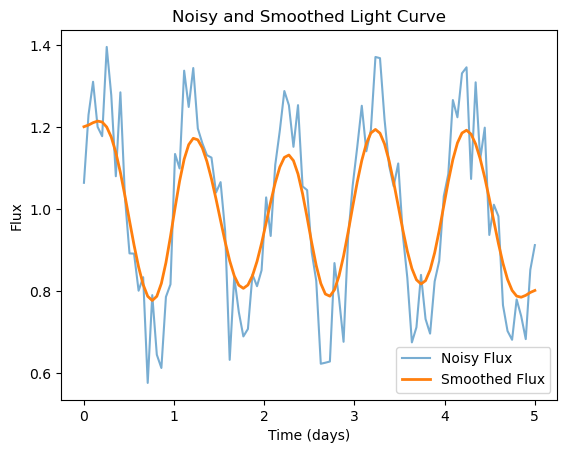

In [3]:
from utils import generate_light_curve, smooth_light_curve

# Simulate a noisy light curve
time, noisy_flux = generate_light_curve(period_days=1.0, amplitude=0.3, noise_level=0.1)

# Smooth the light curve
smoothed_flux = smooth_light_curve(noisy_flux, sigma=3)

# Plot
plt.plot(time, noisy_flux, label='Noisy Flux', alpha=0.6)
plt.plot(time, smoothed_flux, label='Smoothed Flux', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('Noisy and Smoothed Light Curve')
plt.legend()
plt.show()

## Part 6: Organize Your Code into a Module

You can create python file including all of your functions and use that as a module.

Instructions:



## Homework 3: Functions, Modules, and Scientific Calculation

After finished coding, record a voice or write a paragraph to answer each if the questions below:

- What was the hardest part of this homework?
- What strategy did you use when you got stuck?
- If you used any AI tool (e.g., ChatGPT), exactly where did you use it, and what did you modify afterward?

### Part 1: Simulate an Astronomical Image with Two Gaussian Sources

Write a function:

In [31]:
def create_double_source_image(size, centers, amplitudes, sigmas, noise_level=50):
    """
    Generate a simulated image with two Gaussian sources at given centers, amplitudes, and sigmas.
    The background should have Gaussian noise with mean 1000 and given noise_level.
    """

Requirements:

- The image size should be customizable (e.g., size=(100,100)).
- The two sources should have different brightnesses and different PSF widths.
- Add background noise.
- Visualize the final image using imshow.


🔵 Bonus Challenge: Allow the function to create N sources if a list of centers is given (not just 2).

## Part 2: Analyze the Sources

### Exercise: Find Brightest Pixel and Measure Flux

Write two separate functions:

1. **`find_brightest_pixel(image)`**  
    → Returns the (x, y) location and value of the brightest pixel.

2. **`measure_flux(image, center, radius)`**  
    → Returns the total flux within a circular aperture of a given radius around a specified center.

---

**Hint:**  
You can define a circular aperture as the set of points satisfying:

$$(x - x_c)^2 + (y - y_c)^2 < r^2$$

where:
- $(x_c, y_c)$ are the center coordinates
- $r$ is the radius

---

**Instructions:**

- Find the brightest source using `find_brightest_pixel`.
- Measure the flux within a radius of **5 pixels** around the brightest source using `measure_flux`.
- **Comment:**  
  Does the measured flux capture most of the source light? Why or why not?

---


## Part 3: Modify Your Functions

### Exercise: Background Subtraction for Flux Measurement

**Modify your `measure_flux` function** to:

- Subtract the background noise based on the **median value** of all the pixels in the image **before** measuring the flux.
- Then measure the total flux inside the aperture as before.

---

**Updated Task:**

- Find the brightest source using `find_brightest_pixel`.
- Subtract the background (median value) from the entire image.
- Measure the flux within the radius $r$ again.

---

**Question to Answer:**

- How much does background subtraction change your flux estimate?
- Why might background subtraction be important when measuring the flux of astronomical sources?

---

**Hint:**  
- You can compute the median background level with:

```python
background = np.median(image)


## Part 4: Light Curve Simulation

Write a function:

In [33]:
def simulate_variable_star(time_span_days, period_days, amplitude, noise_std):
    """
    Simulate a light curve of a variable star as a sine wave plus Gaussian noise.
    """

Requirements:

- Simulate 100 observations across the time span.
- Visualize the light curve.
- Overplot the "true" noiseless signal.

## Part 5: Make your module

### - Create a module for your functions and import that into your notebook.
### - Use functions in your module in your notebook.
### - Submit your module .py file along with your notebook.